In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, \
cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score,\
confusion_matrix, classification_report, roc_auc_score, plot_confusion_matrix
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
RANDOM_STATE = 42

# Overview


# Business Problem

# Data

# Method

# Results

In [2]:
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then accuracy
    From Regression Trees and Model Optimization - Lab
    """

    f1 = f1_score(y_true, y_predict)
    accuracy = accuracy_score(y_true, y_predict)
    roc_auc = roc_auc_score(y_true, y_predict)

    return [f1, accuracy, roc_auc]
def get_score(model, x_train, x_test, y_train, y_test):
    """
    Returns score from any given model and train test split data
    """
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = performance(y_test, y_pred)
    return score

In [3]:
df = pd.read_csv('../Data/processed_varibles.csv')
target = pd.read_csv('../Data/processed_target.csv')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    df, target, random_state=RANDOM_STATE, test_size=.2)

In [5]:
dt_param_grid = {
    'max_depth' : [12, 13, 14, 15],
    'min_samples_split' : [25, 26, 27],
    'min_samples_leaf' : [12, 13, 14, 15, 16],
    'max_features' : [0.2, 0.25, 0.35, 0.4 ]
}

In [15]:
dt_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3,
                              return_train_score=True)
dt_grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [12, 13, 14, 15],
                         'max_features': [0.2, 0.25, 0.35, 0.4],
                         'min_samples_leaf': [12, 13, 14, 15, 16],
                         'min_samples_split': [25, 26, 27]},
             return_train_score=True)

In [31]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(x_test, y_test)
print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print(f"Optimal Parameters: {dt_grid_search.best_params_}")
dt_grid_search.best_score_

Mean Training Score: 82.47%
Mean Test Score: 81.38%
Optimal Parameters: {'max_depth': 15, 'max_features': 0.4, 'min_samples_leaf': 12, 'min_samples_split': 26}


0.8071191400307435

In [6]:
final_dt_clf = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=15,
                                     max_features=0.4, min_samples_leaf=12, 
                                     min_samples_split=26)
final_dt_clf.fit(x_train, y_train)
y_preds = final_dt_clf.predict(x_test)
score = performance(y_test, y_preds)
score

[0.8467470832509393, 0.8025980641874682, 0.7764282381020609]

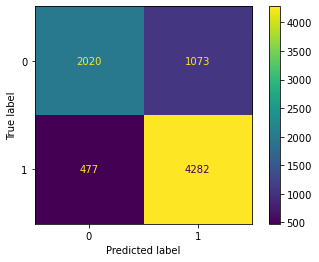

In [7]:
plot_confusion_matrix(final_dt_clf, x_test, y_test)

In [19]:
Feature_importance = {}
for i in range(len(x_train.columns.to_list())):
    Feature_importance[x_train.columns.to_list()[i]] = \
    round(final_dt_clf.feature_importances_[i], 8)

In [21]:
{k: v for k, v in sorted(Feature_importance.items(),
                         key=lambda item: item[1], reverse=True)}

{'quantity_dry': 0.19085735,
 'extraction_type_class_other': 0.17327181,
 'quantity_enough': 0.09663506,
 'construction_year': 0.06183081,
 'latitude': 0.04787517,
 'longitude': 0.04241033,
 'gps_height': 0.03944186,
 'population': 0.03583862,
 'payment_type_never pay': 0.0270554,
 'region_code': 0.02568688,
 'extraction_type_class_motorpump': 0.01913135,
 'district_code': 0.01693479,
 'waterpoint_type_communal standpipe': 0.01692016,
 'management_vwc': 0.01279199,
 'extraction_type_class_submersible': 0.01123937,
 'waterpoint_type_other': 0.00992445,
 'id': 0.00961011,
 'management_company': 0.00936757,
 'waterpoint_type_improved spring': 0.00904546,
 'source_type_borehole': 0.00859887,
 'permit_False': 0.00784521,
 'basin_Lake Victoria': 0.00725661,
 'payment_type_unknown': 0.00681707,
 'source_type_shallow well': 0.00660065,
 'source_class_surface': 0.00626097,
 'waterpoint_type_communal standpipe multiple': 0.00593447,
 'permit_True': 0.00577525,
 'payment_type_monthly': 0.00561597